# Tarea 2 parte 1 IMA543

U-Net es una red con arquitectura tipo Encoder-Decoder, diseñada para la segmentación de imágenes biomédicas. El codificador está diseñado para reducir la resolución de las imágenes (ruta de contracción), mientras que el decodificador está diseñado para aumentar la resolución mediante el uso de "skip connections" (ruta de expansión).

A continuación, podemos observar un esquema que representa a la arquitectura de U-Net.


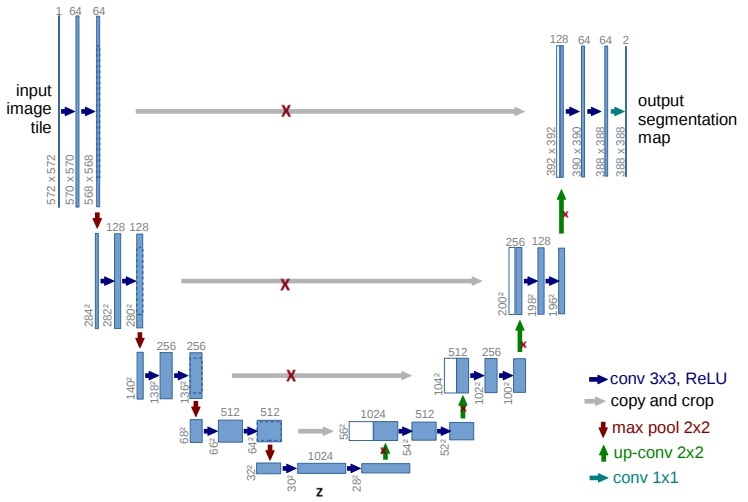

Consta de una ruta de contracción (codificador) y una ruta de expansión (decodificador). 

La ruta de contratación sigue la arquitectura típica de una red convolucional. Consiste en la aplicación repetida de dos convoluciones de $3 \times 3$ (convoluciones sin relleno), cada una seguida de una unidad rectificadora lineal (ReLU) y una operación de agrupación máxima de $2 \times 2$ con paso 2 para reducir la resolución. En cada paso de reducción de resolución duplicamos el número de canales. 

Cada paso en la ruta expansiva consiste en un muestreo ascendente del mapa de características seguido de una convolución de $2 \times 2$ (convolución ascendente) que reduce a la mitad el número de canales de características, una concatenación con el mapa de características recortado, correspondiente a la ruta de contracción y dos convoluciones de $3 \times 3$, cada uno seguido de una activación ReLU. El recorte es necesario debido a la pérdida de píxeles del borde en cada convolución. 

En la capa final se utiliza una convolución de $1 \times 1$ para asignar cada vector de características de 64 componentes al número deseado de clases, en este caso 2. En total la red tiene 23 capas convolucionales.

## Pregunta 1 (5 pts)

Utilizando Keras, implementar la arquitectura U-Net. Considere que la red recibirá imágenes de entrada de tamaño $640 \times 640 \times 1$.

In [2]:
from tensorflow.keras.layers import Dense, Input,ReLU,Concatenate
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

In [8]:
##parametros 
layer_filters=[64,128,256,512]#modificar dps 
kernel_sz=3 
latent_dim=16
##encoder 
inputs=Input(shape=(572,572,1),name='encoder_input')  
x=inputs  
#guardadando lo necesario 
x_guardado=[]
for filters in layer_filters:
    x=Conv2D(filters=filters, kernel_size=kernel_sz, activation='relu', padding='valid')(x)
    x=Conv2D(filters=filters, kernel_size=kernel_sz, activation='relu', padding='valid')(x) 
    x_guardado.append(x) 
    x=MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)   

x=Conv2D(filters=1024, kernel_size=kernel_sz, activation='relu', padding='valid')(x) 
x=Conv2D(filters=1024, kernel_size=kernel_sz, activation='relu', padding='valid')(x)  
x_guardado.append(x)
shape = K.int_shape(x) 

x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)
encoder = Model(inputs, latent, name='encoder')
encoder.summary() 
#parametros 
##decoder  
latent_inputs = Input(shape=(56,56,1024), name='decoder_input')  
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)   
x=Conv2DTranspose(filters=filters, kernel_size=(2, 2), strides=(2, 2), padding='same')(x) 
x = Conv2D(filters=layer_filters[0], kernel_size=(3, 3), activation='relu', padding='valid')(x)
x = Conv2D(filters=layer_filters[0], kernel_size=(3, 3), activation='relu', padding='valid')(x)




Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 572, 572, 1)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 570, 570, 64)      640       
                                                                 
 conv2d_31 (Conv2D)          (None, 568, 568, 64)      36928     
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 284, 284, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 282, 282, 128)     73856     
                                                                 
 conv2d_33 (Conv2D)          (None, 280, 280, 128)     147584    
                                                           

ValueError: Input 0 of layer "conv2d_transpose" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 802816)

In [7]:
x_guardado

[<KerasTensor: shape=(None, 568, 568, 64) dtype=float32 (created by layer 'conv2d_21')>,
 <KerasTensor: shape=(None, 280, 280, 128) dtype=float32 (created by layer 'conv2d_23')>,
 <KerasTensor: shape=(None, 136, 136, 256) dtype=float32 (created by layer 'conv2d_25')>,
 <KerasTensor: shape=(None, 64, 64, 512) dtype=float32 (created by layer 'conv2d_27')>,
 <KerasTensor: shape=(None, 28, 28, 1024) dtype=float32 (created by layer 'conv2d_29')>]

## Pregunta 2 (1 pto)

Crear un repositorio en Github y subir la solución de la Tarea. El nombre del repositorio debe ser *NombreApredilloTarea2*. Además, agregar al profesor como colaborador (user=aferreira8923).